In [ ]:
import os
os.chdir('drive/MyDrive/AI201715064')

(200, 2) (200,)


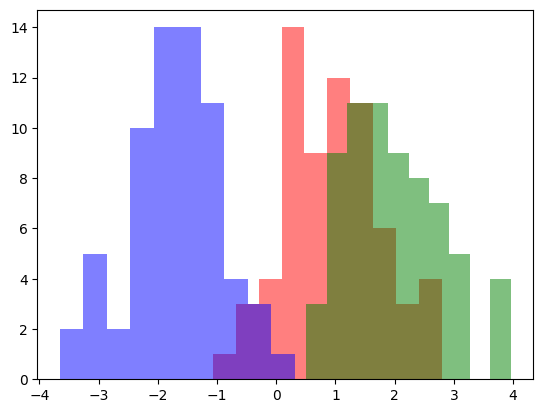

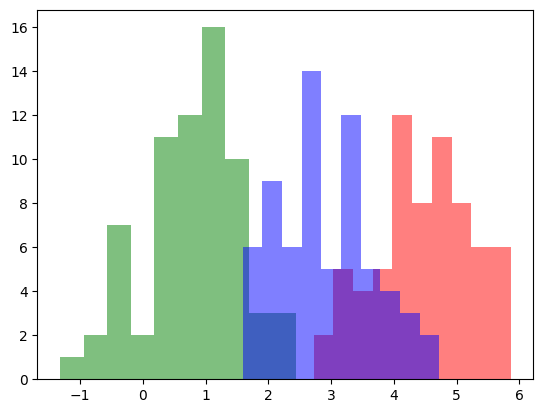

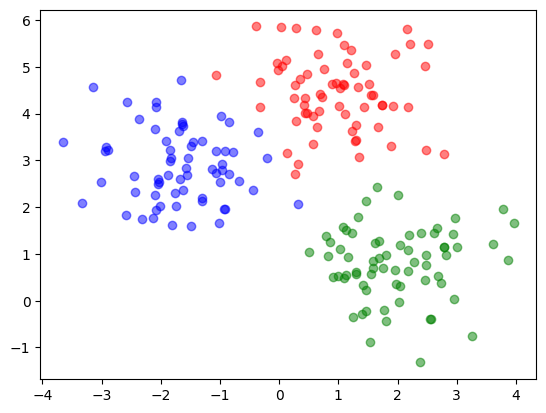

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


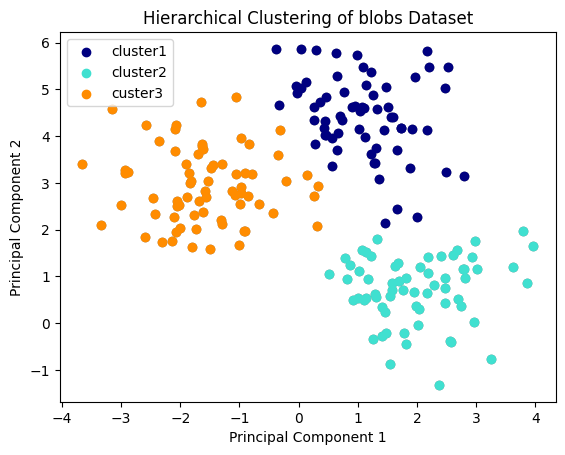

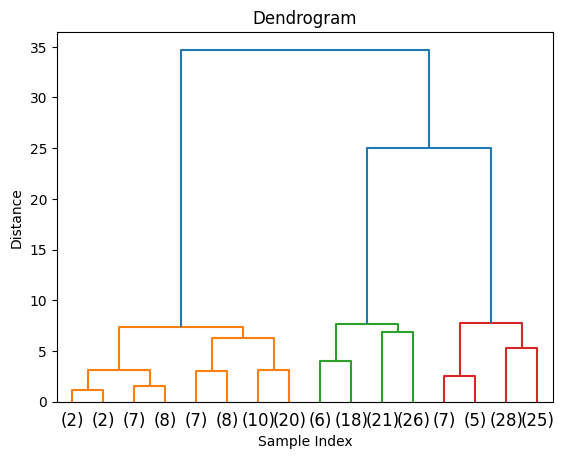

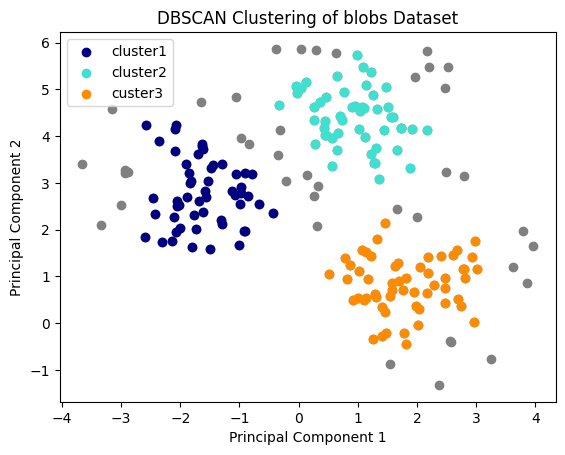

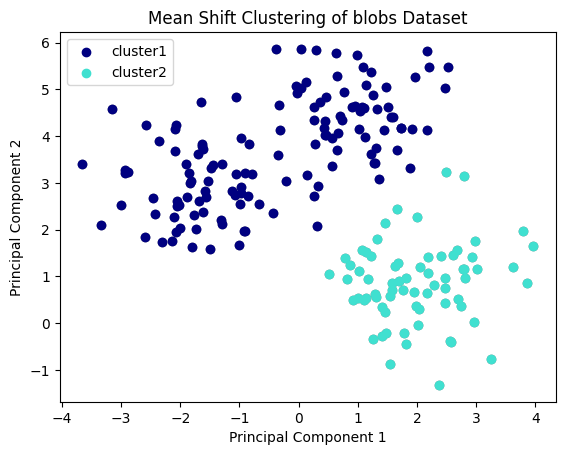

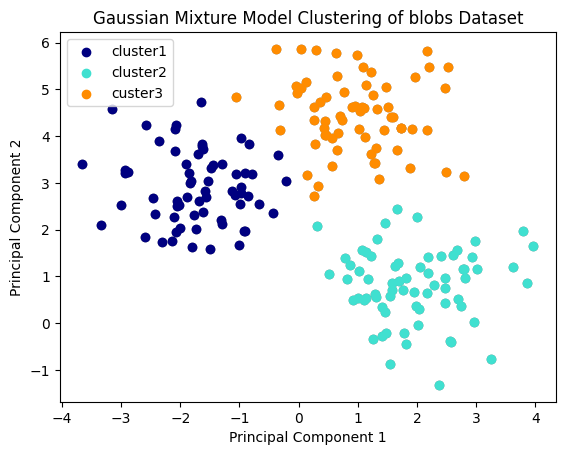

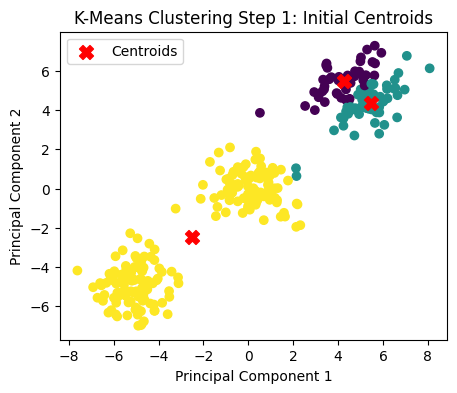

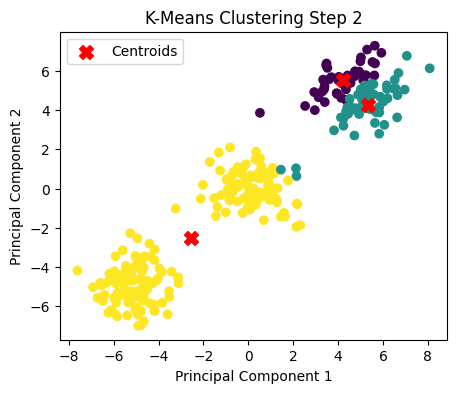

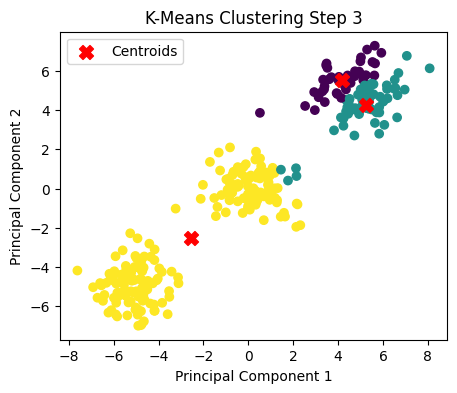

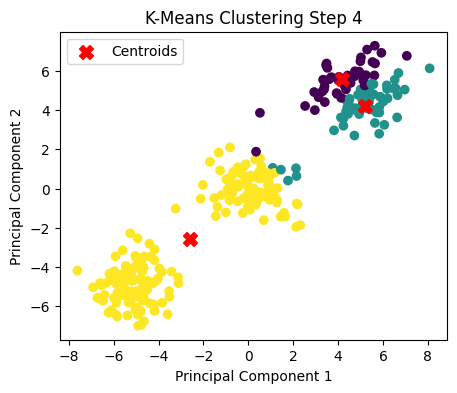

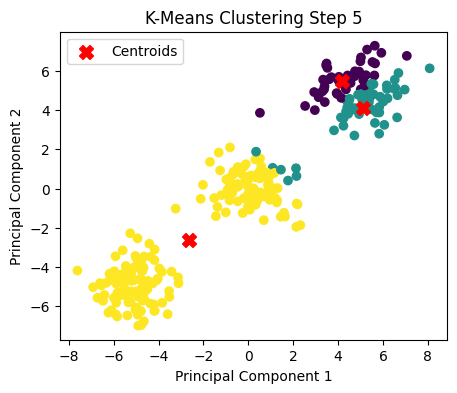

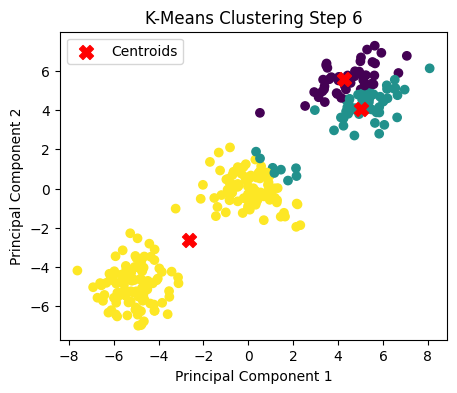

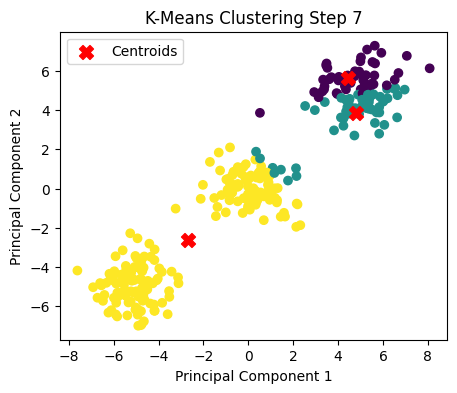

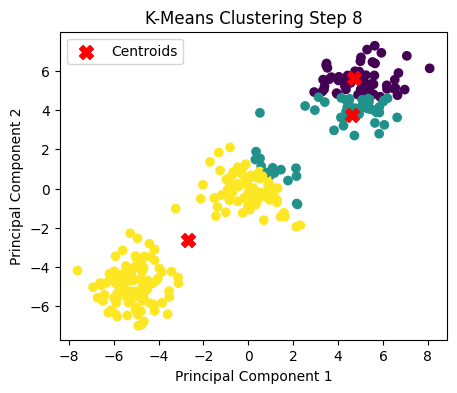

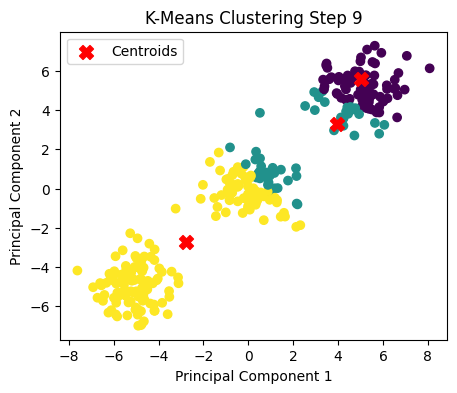

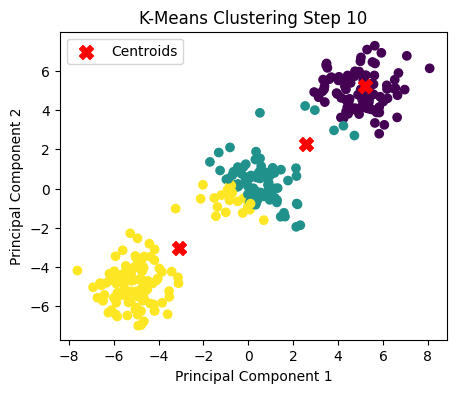

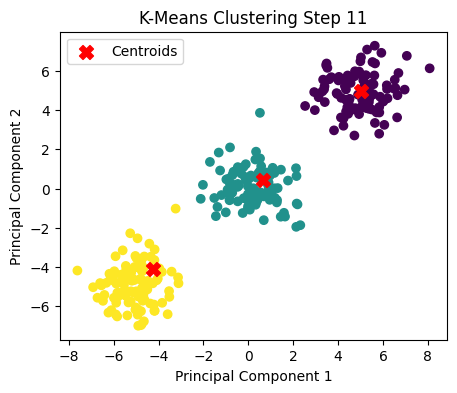

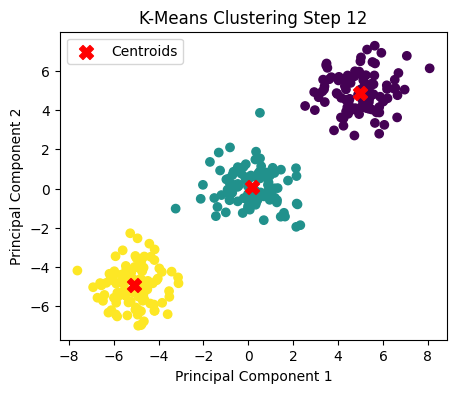

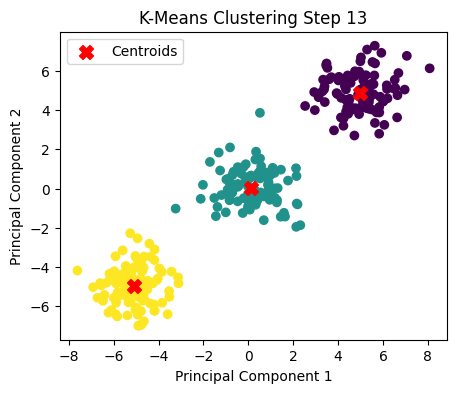

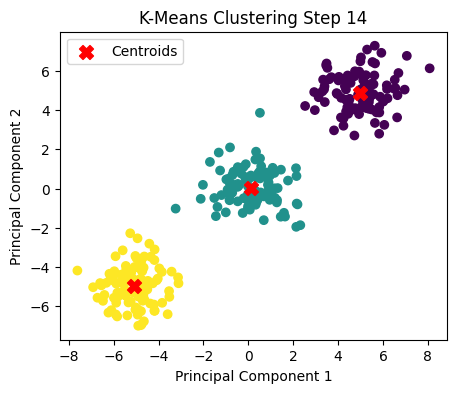

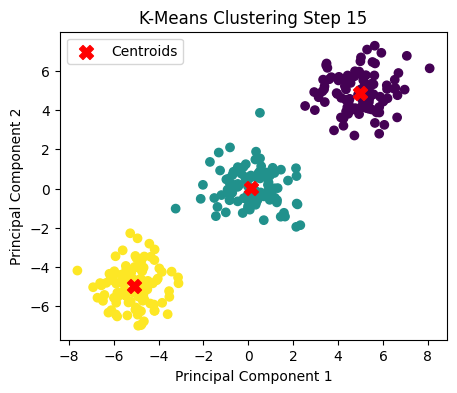

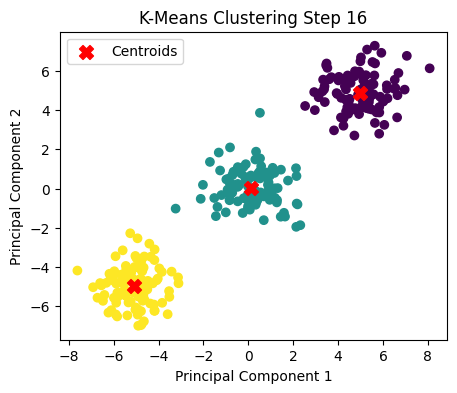

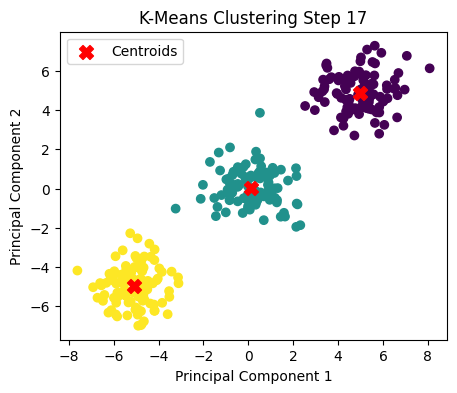

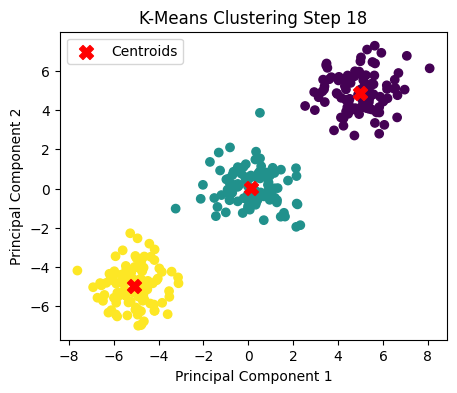

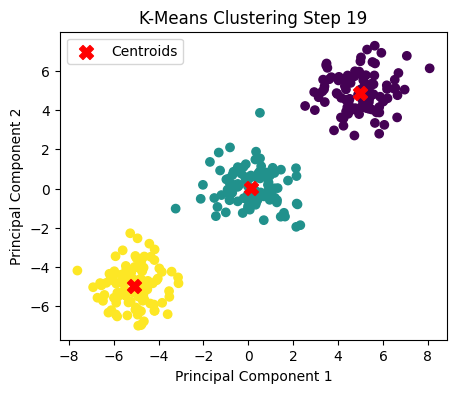

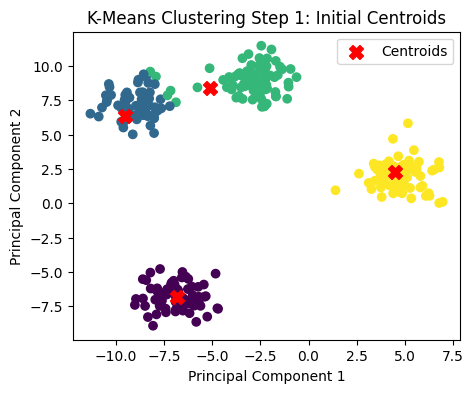

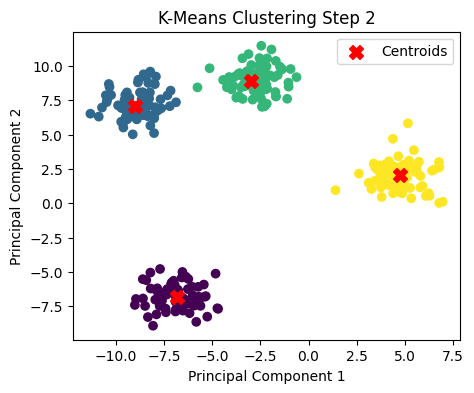

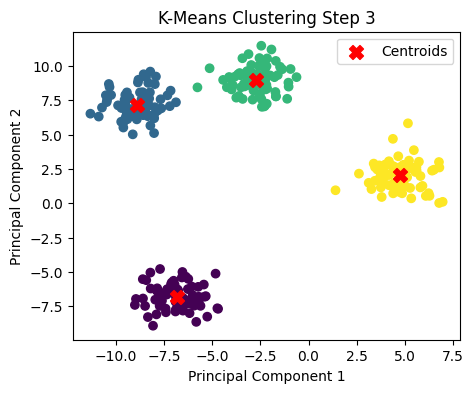

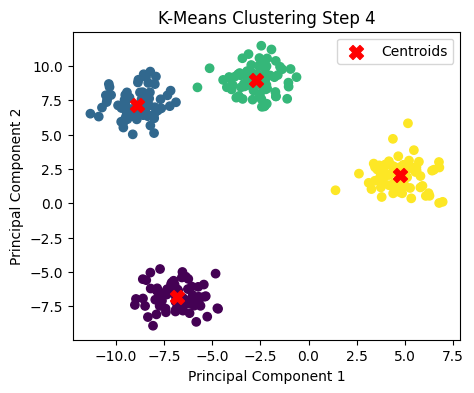

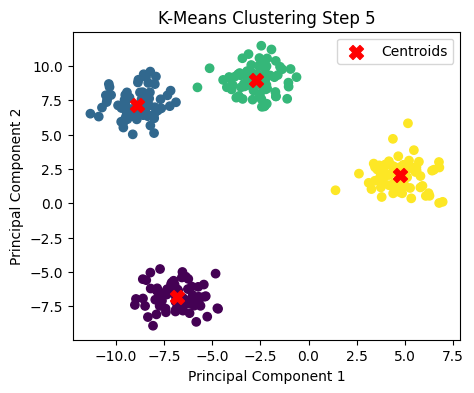

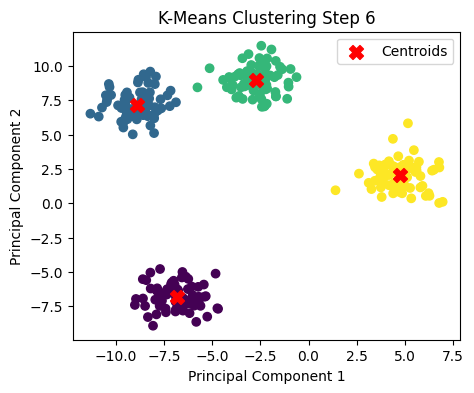

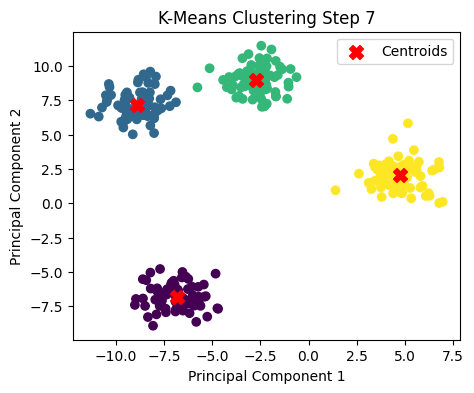

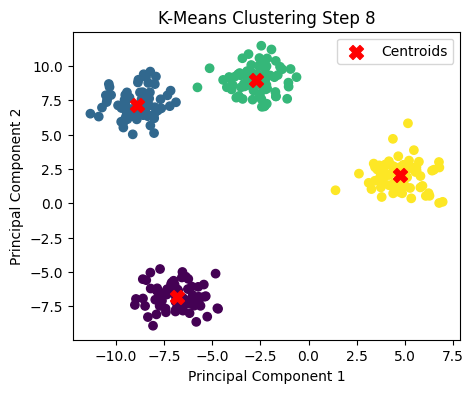

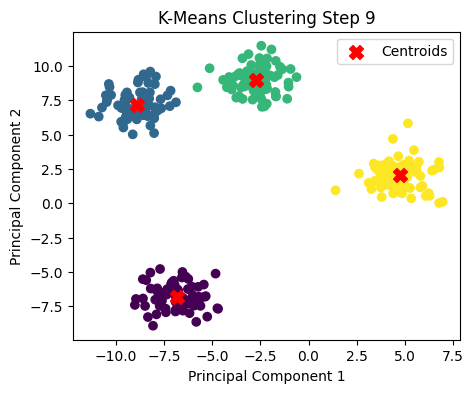

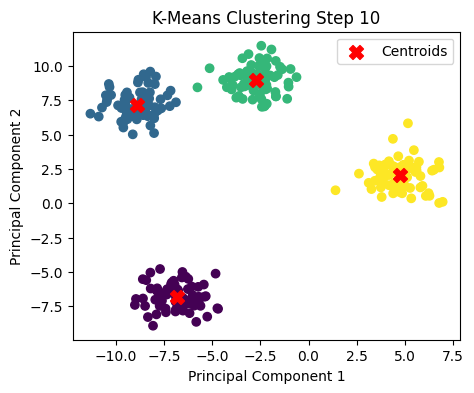

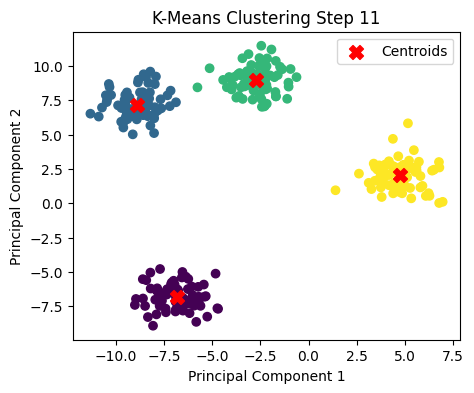

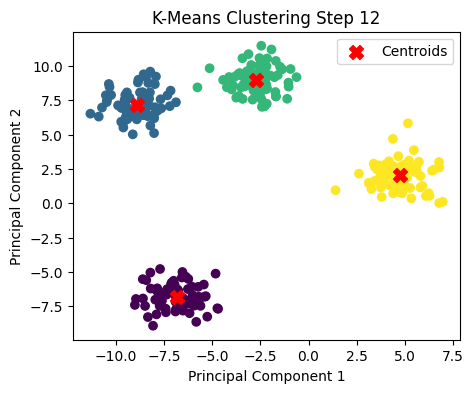

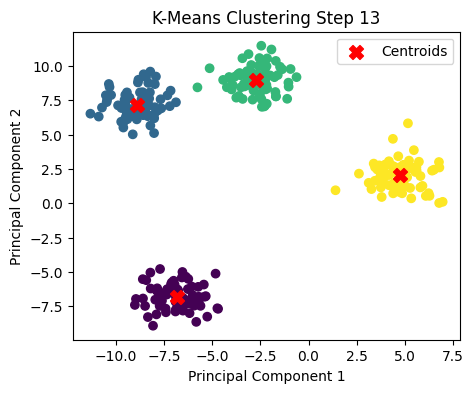

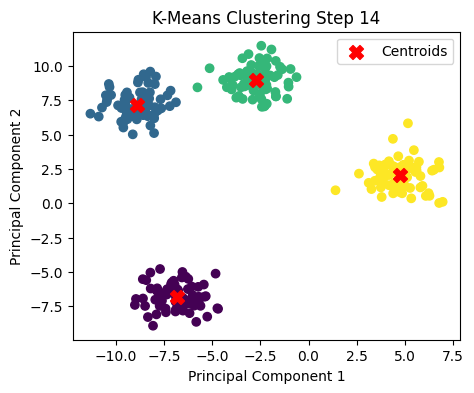

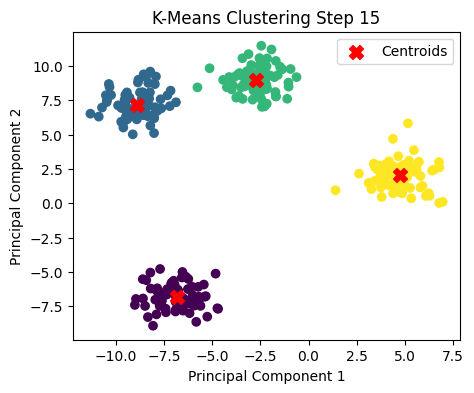

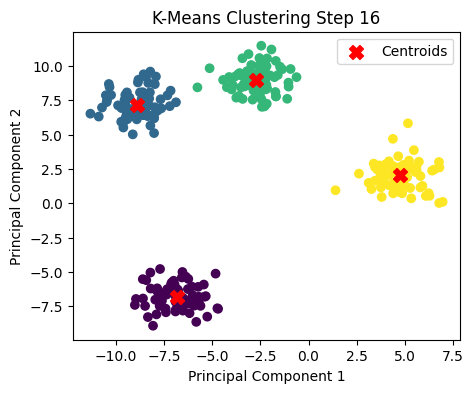

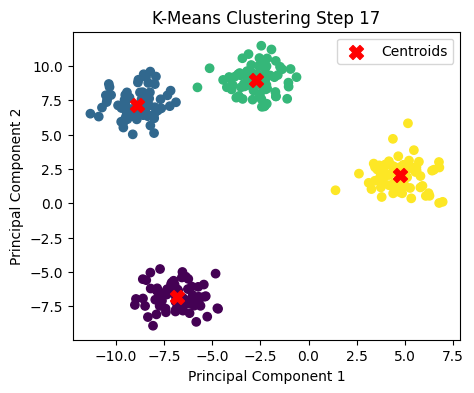

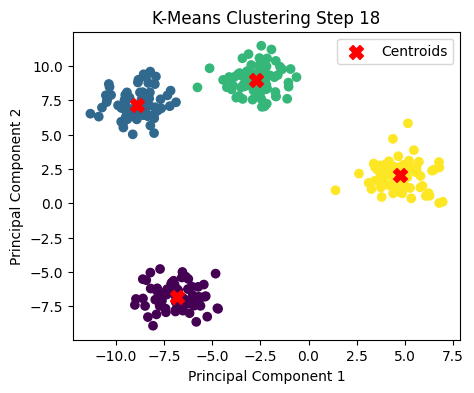

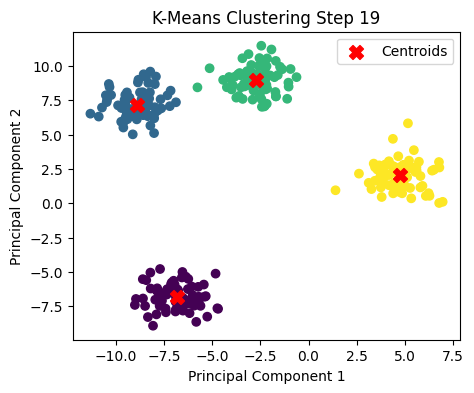

In [ ]:
%load_ext autoreload
%autoreload 2


# %% [code]
!pip install umap-learn


# %% [code]
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris  #사용할 데이터

## 차원 축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
import umap

## clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN, MeanShift
from sklearn.mixture import GaussianMixture

## Custom code (내부 함수 draw_2D_data_scatter, custom_cluster_step_dataset_one, custom_cluster_step_dataset_two 불러오기)
from utils import draw_2D_data_scatter
from custom_dataset import custom_cluster_step_dataset_one, custom_cluster_step_dataset_two



# %% [code]
# Iris 데이터 로드
iris_data = load_iris()
X_data = iris_data.data
y_data = iris_data.target
target_names = iris_data.target_names## 타겟 이름 불러오기


# %% [code]
print(X_data.shape, y_data.shape)
print(target_names)


# %% [code]
# feautre 0, 1 사용하여 2차원으로 축소
X_feature = X_data[:, :2]##

# 시각화
colors = ['red', 'green', 'blue']

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_feature[y_data == i, 0], X_feature[y_data == i, 1], color=color, label=target_name)   ##

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Feature selection of IRIS Dataset')
plt.legend(loc='best')
plt.show()


# %% [code]
# feautre 0, 1 사용하여 2차원으로 축소
X_feature = X_data[:, 1:3]

# 시각화
colors = ['red', 'green', 'blue']

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_feature[y_data == i, 0], X_feature[y_data == i, 1], color=color, label=target_name)   ## 위와 동일

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Feature selection of IRIS Dataset')
plt.legend(loc='best')
plt.show()


# %% [code]
# PCA를 사용하여 2차원으로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_data)



# 시각화
colors = ['red', 'green', 'blue']

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y_data == i, 0], X_pca[y_data == i, 1], color=color, label=target_name)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of IRIS Dataset')
plt.legend(loc='best')
plt.show()


# %% [code]
# LDA를 사용하여 2차원으로 축소
Ida = LDA(n_components=2)
X_lda = Ida.fit_transform(X_data, y_data)


# 시각화
colors = ['red', 'green', 'blue']

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_lda[y_data == i, 0], X_lda[y_data == i, 1], color=color, label=target_name)

plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.title('LDA of IRIS Dataset')
plt.legend(loc='best')
plt.show()


# %% [code]
# t-SNE를 사용하여 2차원으로 축소
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_data)


# 시각화
colors = ['red', 'green', 'blue']

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_tsne[y_data == i, 0], X_tsne[y_data == i, 1], color=color, label=target_name)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of IRIS Dataset')
plt.legend(loc='best', scatterpoints=1)
plt.show()


# %% [code]
# UMAP을 사용하여 2차원으로 축소
umap_reducer = umap. UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_data)


# 시각화
colors = ['red', 'green', 'blue']

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_umap[y_data == i, 0], X_umap[y_data == i, 1], color=color, label=target_name)

plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP of IRIS Dataset')
plt.legend(loc='best', scatterpoints=1)
plt.show()


# %% [code]
from sklearn.datasets import make_blobs   ## custom data 생성용


# %% [code]
# make_blobs으로 데이터 만들어보기
X_cluster, y_cluster = make_blobs(n_samples= 200, n_features=2, centers = 3, cluster_std=0.8, random_state=0)

# %% [code]
print(X_cluster.shape, y_cluster.shape)


# %% [code]
for color, i in zip(colors, [0, 1, 2]):
  plt.hist(X_cluster[y_cluster==i, 0], color=color, alpha=.5)
plt.show()


# %% [code]
for color, i in zip(colors, [0, 1, 2]):
  ## 위와 비슷하게 1번째 feature에 대해 출력
  plt.hist(X_cluster[y_cluster == i, 1], color=color, alpha =.5)
plt.show()


# %% [code]
for color, i in zip(colors, [0, 1, 2]):
  plt.scatter(X_cluster[y_cluster == i, 0], X_cluster[y_cluster == i, 1], color=color, alpha =.5) ## 0번째와 1번째 feature에 대해서 scatter plot 그리기
plt.show()


# %% [code]
# 계층적 클러스터링
hierarchical_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hierarchical_clustering.fit_predict(X_cluster)

# 클러스터링 결과 시각화
draw_2D_data_scatter(X_cluster[:, 0], X_cluster[:, 1], y_hc, 'Hierarchical Clustering of blobs Dataset')


# %% [code]
# 덴드로그램 시각화
linked = linkage(X_cluster, 'ward')
dendrogram(linked, p = 3, truncate_mode='level')
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()



# %% [code]
# DBSCAN 클러스터링
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_cluster)


# 클러스터링 결과 시각화
draw_2D_data_scatter(X_cluster[:, 0], X_cluster[:, 1], y_dbscan, 'DBSCAN Clustering of blobs Dataset')


# %% [code]
# Mean Shift 클러스터링
meanshift = MeanShift ()
y_meanshift = meanshift.fit_predict(X_cluster)

# 클러스터링 결과 시각화
draw_2D_data_scatter(X_cluster[:, 0], X_cluster[:, 1], y_meanshift, 'Mean Shift Clustering of blobs Dataset')


# %% [code]
# GMM 클러스터링
gmm = GaussianMixture(n_components=3, random_state=42)
y_gmm =gmm.fit_predict(X_cluster)

# 클러스터링 결과 시각화
draw_2D_data_scatter(X_cluster[:, 0], X_cluster[:, 1], y_gmm, 'Gaussian Mixture Model Clustering of blobs Dataset')


# %% [code]
# 예시 데이터 생성
X_cluster_step = custom_cluster_step_dataset_one()
# 클러스터 개수 설정
cluster_num = 3

# K-Means 클러스터링
kmeans = KMeans(n_clusters=cluster_num, init='random', n_init=1, max_iter=1, random_state=42)
y_kmeans = kmeans.fit_predict(X_cluster_step)

# 초기 중심점 시각화
plt.figure(figsize=(5, 4))
plt.scatter(X_cluster_step[:, 0], X_cluster_step[:, 1], c=y_kmeans)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='X', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Step 1: Initial Centroids')
plt.legend()
plt.show()

# 두 번째 단계 (최대 20번 반복하여 단계별로 진행)
for i in range(2, 20):
    ## 초기 kmeans의 중심점 불러와서 1번만 실행하는 kmeans 만들기
    kmeans = KMeans(n_clusters=cluster_num, init=kmeans.cluster_centers_, n_init=1, max_iter=1, random_state=42)
    y_kmeans = kmeans.fit_predict(X_cluster_step)

    # 클러스터링 단계 시각화
    plt.figure(figsize=(5, 4))
    plt.scatter(X_cluster_step[:, 0], X_cluster_step[:, 1], c=y_kmeans)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='X', label='Centroids')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'K-Means Clustering Step {i}')
    plt.legend()
    plt.show()


# %% [code]
# 예시 데이터 생성
X_cluster_step = custom_cluster_step_dataset_two()
# 클러스터 개수 설정
cluster_num = 4

# K-Means 클러스터링
## random state 바꾸면서 진행해보기
kmeans = KMeans(n_clusters=cluster_num, init='random', n_init=1, max_iter=1, random_state=5)
y_kmeans = kmeans.fit_predict(X_cluster_step)

# 초기 중심점 시각화
plt.figure(figsize=(5, 4))
plt.scatter(X_cluster_step[:, 0], X_cluster_step[:, 1], c=y_kmeans)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='X', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Step 1: Initial Centroids')
plt.legend()
plt.show()

# 두 번째 단계 (최대 10번 반복하여 단계별로 진행)
for i in range(2, 20):
    ## 초기 kmeans의 중심점 불러와서 1번만 실행하는 kmeans 만들기
    kmeans = KMeans(n_clusters=cluster_num, init=kmeans.cluster_centers_, n_init=1, max_iter=1, random_state=42)
    y_kmeans = kmeans.fit_predict(X_cluster_step)

    # 클러스터링 단계 시각화
    plt.figure(figsize=(5, 4))
    plt.scatter(X_cluster_step[:, 0], X_cluster_step[:, 1], c=y_kmeans)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='X', label='Centroids')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'K-Means Clustering Step {i}')
    plt.legend()
    plt.show()